In [1]:
import sqlite3
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns


Part 1: Wrangling

In [2]:
#Problem 1

sqlite_file = 'lahman2014.sqlite'
conn = sqlite3.connect(sqlite_file)

#SQL compute total_payroll by summing salary for each team (that is, for each teamID and yearID combination)
salary_query = "SELECT lgId, teamId, yearID, sum(salary) as total_payroll FROM Salaries WHERE yearID>=1990 GROUP BY yearID, teamId"

#SQL compute a relation containing the total payroll and winning percentage (number of wins / number of games * 100) 
#for each team (that is, for each teamID and yearID combination)
team_query = "SELECT franchID, W, G, lgId, teamId, yearID, ROUND(W * 100.0 / G, 2) AS Percent FROM Teams GROUP BY yearID, teamId"

team_salaries = pd.read_sql(salary_query, conn) # become data frames
team_win= pd.read_sql(team_query, conn)

df= team_salaries.merge(team_win, on=['yearID','teamID','lgID']) #inner join removes missing data

#this df displays all the necessary columns needed to analyse the performances of the team according to their budget 
df.head()

,lgID,teamID,yearID,total_payroll,franchID,W,G,Percent
0,NL,ATL,1990,14555501.0,ATL,65,162,40.12
1,AL,BAL,1990,9680084.0,BAL,76,161,47.20
2,AL,BOS,1990,20558333.0,BOS,88,162,54.32
3,AL,CAL,1990,21720000.0,ANA,80,162,49.38
4,AL,CHA,1990,9491500.0,CHW,94,162,58.02


Data Frame Columns:

    lgID - League ID
    teamID - Team ID
    yearID - year
    total_payroll - Total Payroll
    franchID - Franchise ID
    W - No. of Wins
    G - No. of Games
    Percent - Winning percentage

Part 2: Exploratory Data Analysis

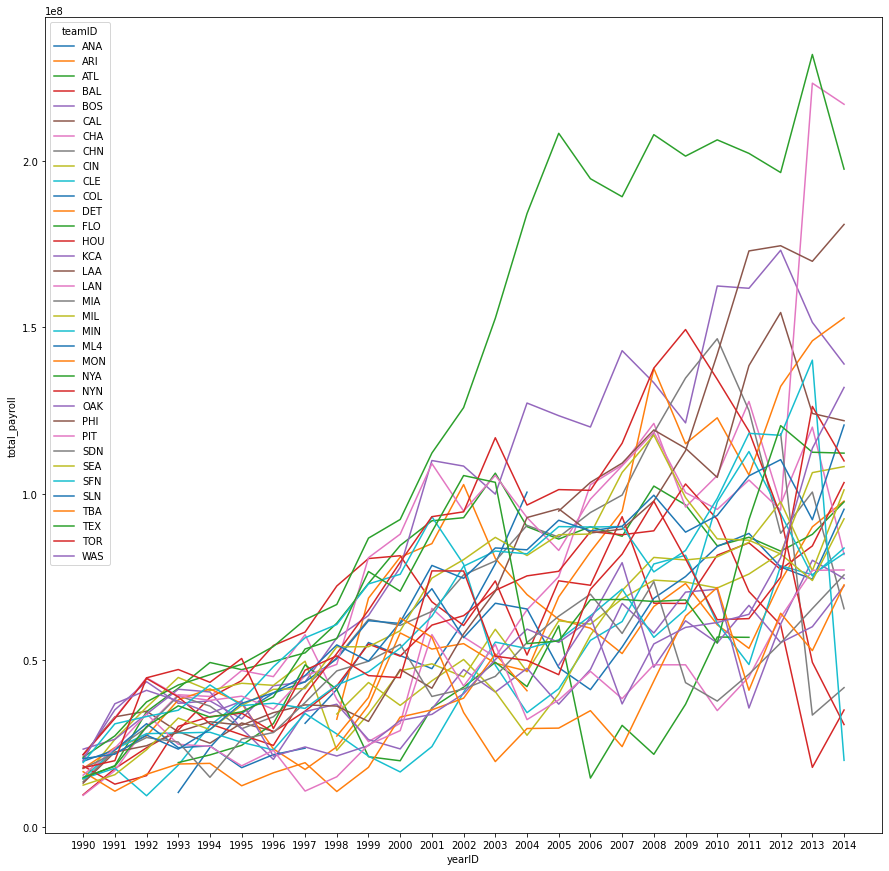

In [3]:
## Problem 2

#the distribution of payrolls across teams conditioned on time (from 1990-2014).

df1 = df.pivot(index='yearID', columns='teamID', values='total_payroll')
#pivot returns reshaped DataFrame organized by given index / column values.
#yearID are rows
#teamID column
#data points are total_payroll
ax = df1.plot(figsize=(15,15),xticks=df1.index) #plot the data
ylab = ax.set_ylabel('total_payroll')

In [4]:
df1

teamID,ANA,ARI,ATL,BAL,BOS,CAL,CHA,CHN,CIN,CLE,...,PHI,PIT,SDN,SEA,SFN,SLN,TBA,TEX,TOR,WAS
yearID,,,,,,,,,,,,,,,,,,,,,
1990,NaN,NaN,14555501.0,9680084.0,20558333.0,21720000.0,9491500.0,13624000.0,14370000.0,14487000.0,...,13173667.0,15556000.0,17588334.0,12553667.0,19335333.0,20523334.0,NaN,14874372.0,17756834.0,NaN
1991,NaN,NaN,18403500.0,17519000.0,35167500.0,33060001.0,16919667.0,23175667.0,26305333.0,17635000.0,...,22487332.0,23634667.0,22150001.0,15691833.0,30967666.0,21860001.0,NaN,18224500.0,19902417.0,NaN
1992,NaN,NaN,34625333.0,23780667.0,43610584.0,34749334.0,30160833.0,29829686.0,35931499.0,9373044.0,...,24383834.0,33944167.0,26854167.0,23179833.0,33163168.0,27583836.0,NaN,30128167.0,44788666.0,NaN
1993,NaN,NaN,41641417.0,29096500.0,37120583.0,28588334.0,39696166.0,39386666.0,44879666.0,18561000.0,...,28538334.0,24822467.0,25511333.0,32696333.0,35050000.0,23367334.0,NaN,36376959.0,47279166.0,NaN
1994,NaN,NaN,49383513.0,38849769.0,37859084.0,25156218.0,39183836.0,36287333.0,40961833.0,30490500.0,...,31599000.0,24217250.0,14916333.0,29228500.0,42638666.0,29275601.0,NaN,32973597.0,43433668.0,NaN
1995,NaN,NaN,47235445.0,43942521.0,32455518.0,31223171.0,46961282.0,29505834.0,43144670.0,37937835.0,...,30555945.0,18355345.0,26382334.0,36481311.0,36462777.0,37101000.0,NaN,34581451.0,50590000.0,NaN
1996,NaN,NaN,49698500.0,54490315.0,42393500.0,28738000.0,45139500.0,33081000.0,42526334.0,48107360.0,...,34314500.0,23017500.0,28348172.0,41328501.0,37144725.0,40269667.0,NaN,39041528.0,29555083.0,NaN
1997,31135472.0,NaN,52278500.0,58516400.0,43558750.0,NaN,57740000.0,42155333.0,49768000.0,56802460.0,...,36656500.0,10771667.0,37363672.0,41540661.0,35592378.0,45456667.0,NaN,53448838.0,47079833.0,NaN
1998,41281000.0,32347000.0,61186000.0,72355634.0,56757000.0,NaN,38335000.0,50838000.0,23005000.0,60800166.0,...,36297500.0,15065000.0,46861500.0,54087036.0,42565834.0,54672521.0,27280000.0,56572095.0,51376000.0,NaN


#### Problem 2 Question 1

Total Payroll increases with time for all teams generally.
The spread of expense that is the standard deviation of the payroll each year has increased.
Near 1990s all teams had payroll very similar to each other.

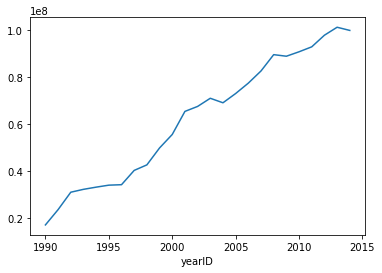

In [5]:
## Problem 3

# statistic for central tendency (here, mean of payrolls for every team for each year) vs. time to show that specficially.
# as you see the mean payroll for each year can be seen increasing
df.groupby('yearID').total_payroll.mean().plot()

#this plot basically finds the mean of all team payrolls according to year and plots it against it. 
#Thus showing the general increase in total payroll over the years

In [6]:
#Problem 4

df2=df.copy() #make a copy to manipulate it for the question
df2['yearID'] = pd.cut(df2['yearID'], [1989,1994,1999,2004,2009,2014]) #discretize year into five time periods

df2 = df2.groupby(['yearID','teamID'], as_index=False)['total_payroll', 'Percent'].mean() 
#group by the five year slots and teams; thereafter find mean of total_payroll and Percent

df2=df2.dropna(subset = ['total_payroll', 'Percent'])
df2.head()

,yearID,teamID,total_payroll,Percent
2,"(1989, 1994]",ATL,31721852.8,56.496
3,"(1989, 1994]",BAL,23785204.0,50.444
4,"(1989, 1994]",BOS,34863216.8,49.514
5,"(1989, 1994]",CAL,28654777.4,45.704
6,"(1989, 1994]",CHA,27090400.4,56.424


Now that our data set copy is manipulated and ready to be plotted we need to seperate the dataset as per the yearID and plot the seperate dataframes

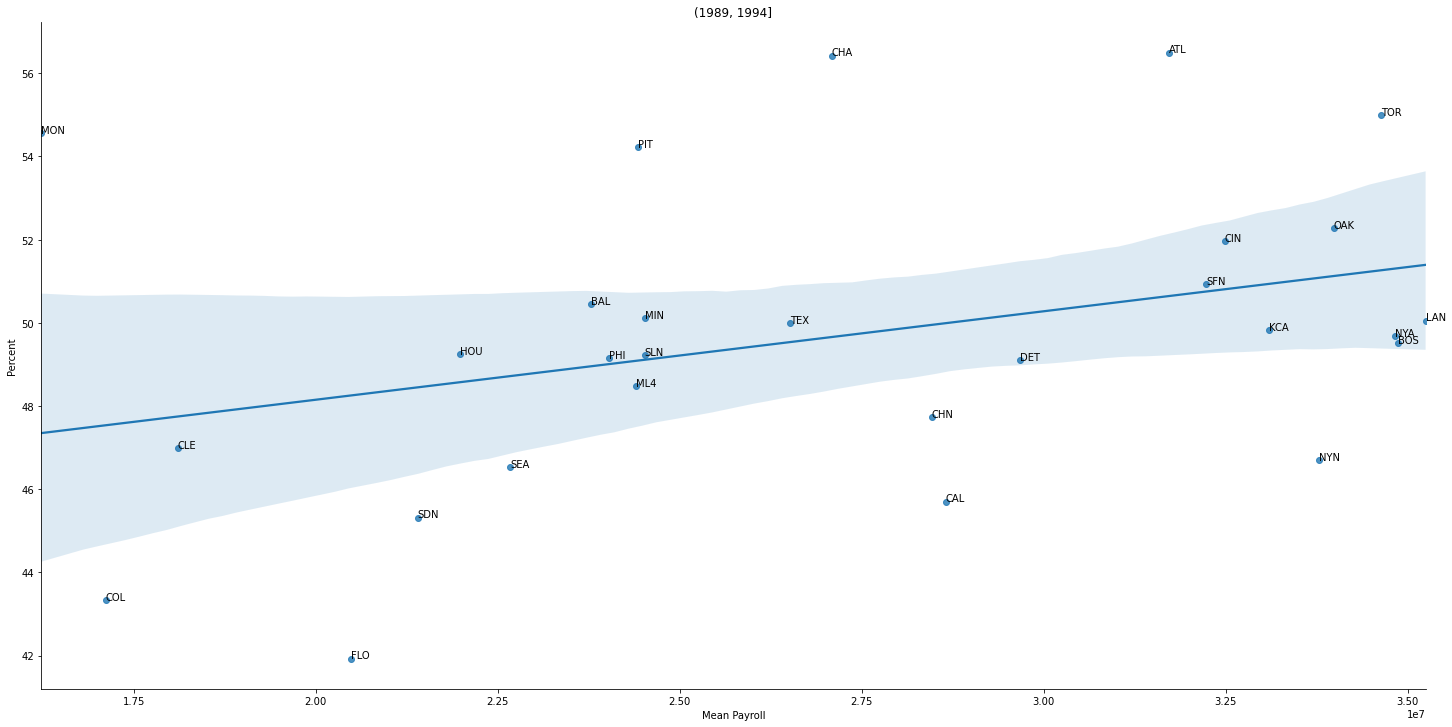

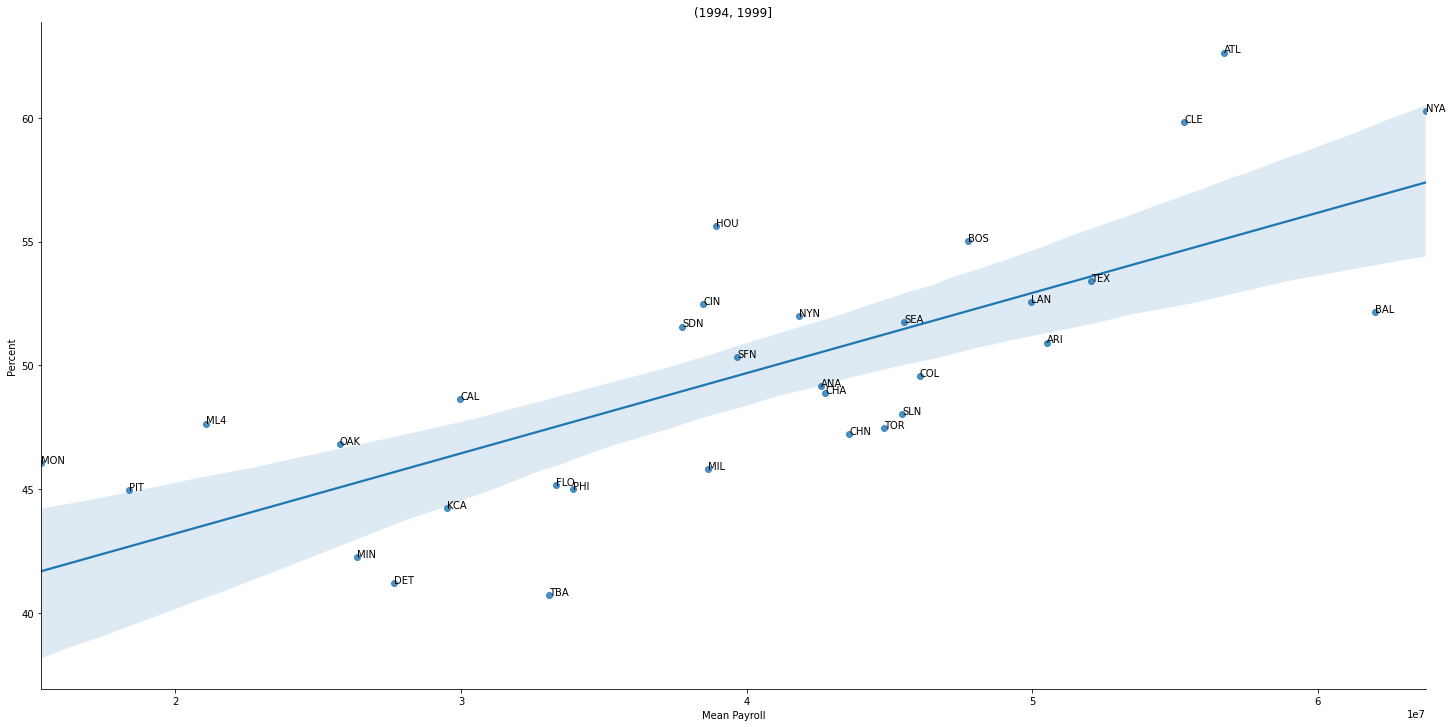

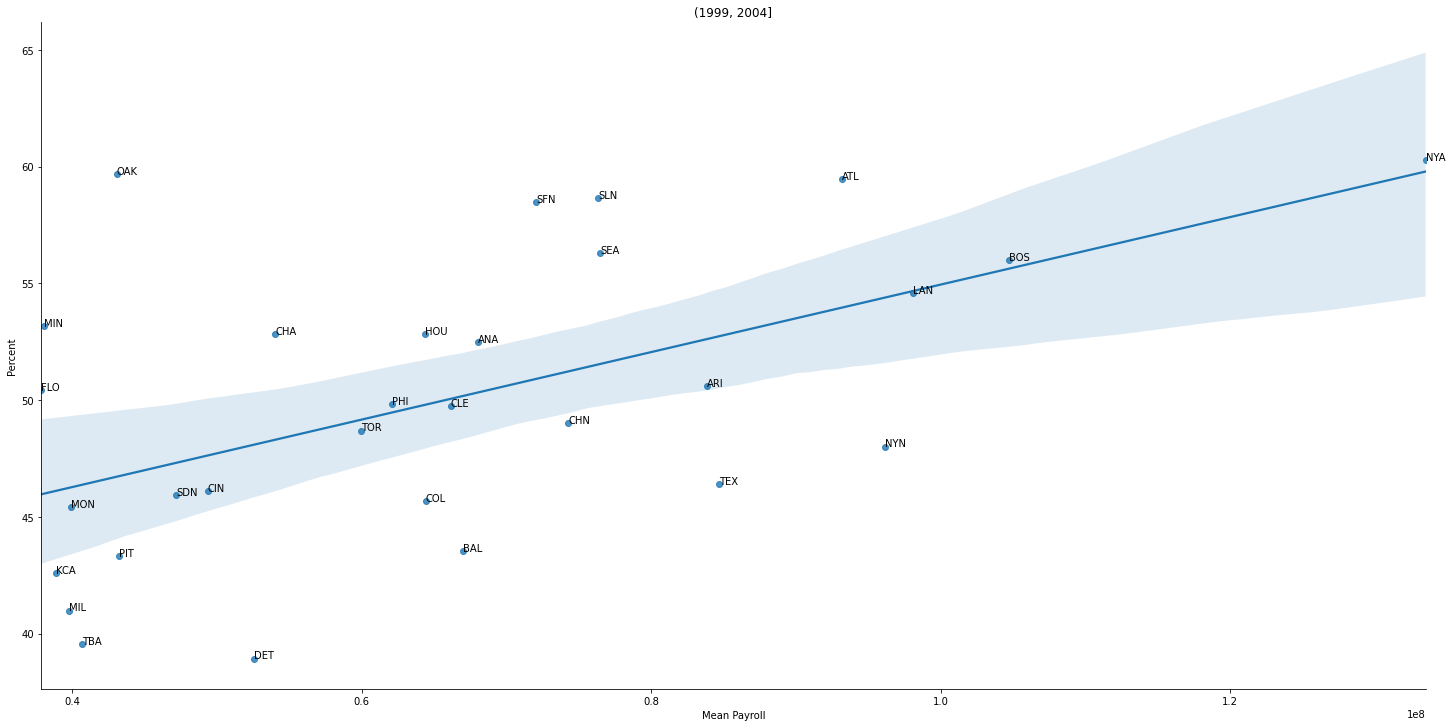

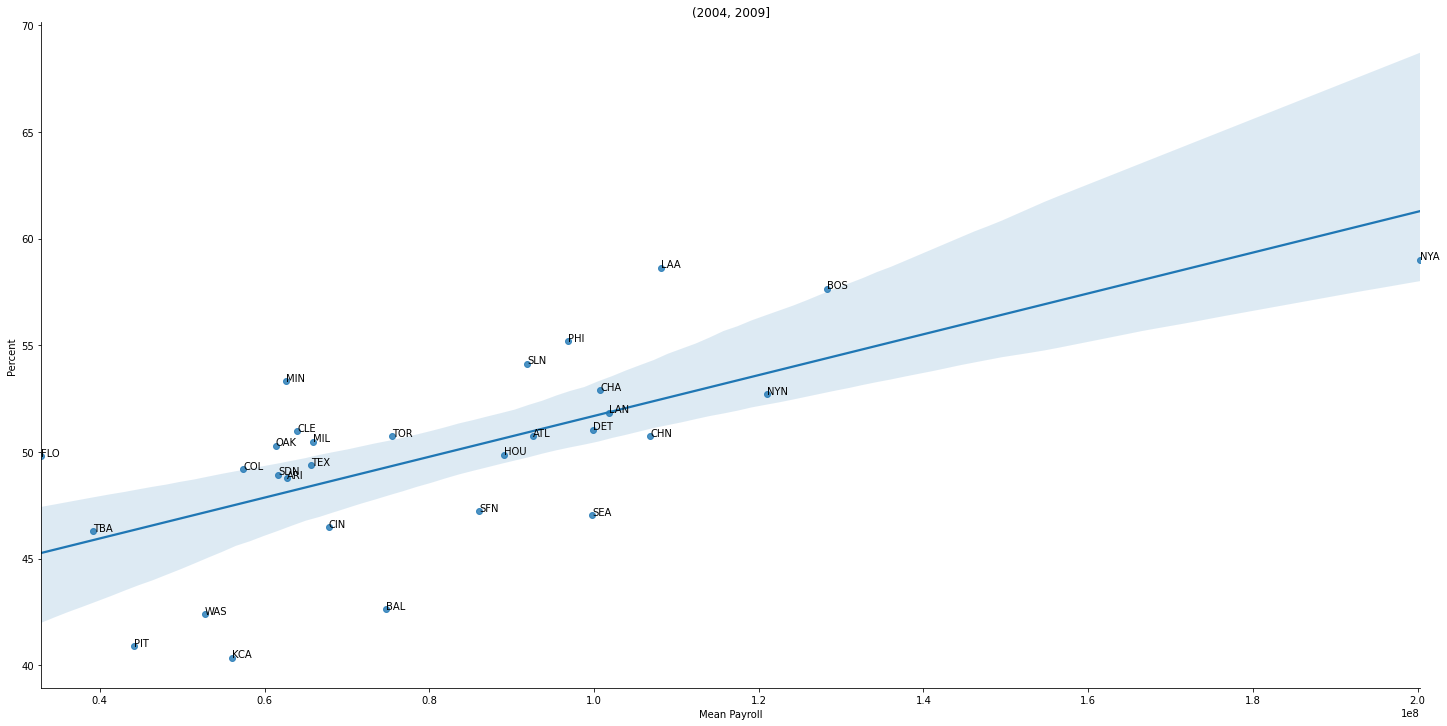

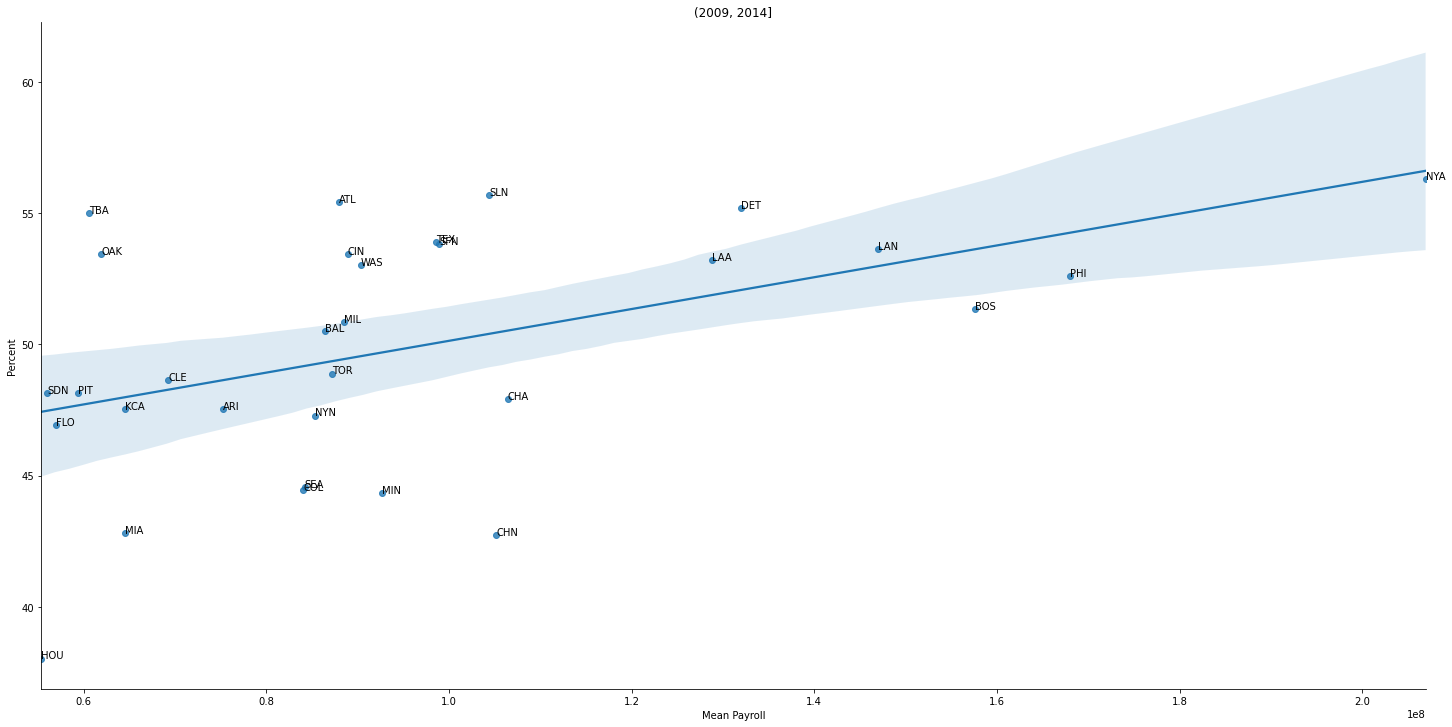

In [7]:
##run a for loop to make seperate dataframes based on yearID and use Seaborn to plot them

for yearID, df_temp in df2.groupby('yearID'):
    ax = sns.lmplot('total_payroll', # Horizontal axis
           'Percent', # Vertical axis
           data=df_temp, # Data source
           fit_reg=True, # Don't fix a regression line
           size = 10,
           aspect =2 ) # size and dimension
    
    plt.title(df_temp['yearID'].iloc[0])
    # Set x-axis label
    plt.xlabel('Mean Payroll')
    # Set y-axis label
    plt.ylabel('Percent')

#label the points as per teamID
    def label_point(x, y, val, ax):
        a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
        for i, point in a.iterrows():
            ax.text(point['x']+.02, point['y'], str(point['val']))

    label_point(df_temp.total_payroll, df_temp.Percent, df_temp.teamID, plt.gca())
    

#### Question 2
Between 1999- 2004 one can see how much better Oakland has performed in comparison to the expectation based on its spending
Between 2009- 2014 Oakland outperformed in comparison to the expectation again but you can see other teams do that as well spending decreased by then for most 

Part 3: Data transformations

In [8]:
#Problem 5
df3= df.copy() #make a copy to create a new variable in your dataset that standardizes payroll conditioned on year

df3['mean'] = df3['total_payroll'].groupby(df3['yearID']).transform('mean') #mean per year of payroll
df3['std'] = df3['total_payroll'].groupby(df3['yearID']).transform('std') #standard deviation per year of payroll
df3['std_payroll'] = (df3['total_payroll'] - df3['mean']) / df3['std'] #using given formula to calculate standardizes payroll

In [9]:
df3.head() #displaying the dataframe showing all the new variables

,lgID,teamID,yearID,total_payroll,franchID,W,G,Percent,mean,std,std_payroll
0,NL,ATL,1990,14555501.0,ATL,65,162,40.12,1.707235e+07,3.771834e+06,-0.667275
1,AL,BAL,1990,9680084.0,BAL,76,161,47.20,1.707235e+07,3.771834e+06,-1.959861
2,AL,BOS,1990,20558333.0,BOS,88,162,54.32,1.707235e+07,3.771834e+06,0.924213
3,AL,CAL,1990,21720000.0,ANA,80,162,49.38,1.707235e+07,3.771834e+06,1.232198
4,AL,CHA,1990,9491500.0,CHW,94,162,58.02,1.707235e+07,3.771834e+06,-2.009859


In [10]:
#Problem 6
df4= df3.copy() #this will be used later because the cutting will modify df3

df3['yearID'] = pd.cut(df3['yearID'], [1989,1994,1999,2004,2009,2014]) #discretize year into five time periods

df3 = df3.groupby(['yearID','teamID'], as_index=False)['std_payroll', 'Percent'].mean() 
#group by the five year slots and teams; thereafter find mean of total_payroll and Percent

df3=df3.dropna(subset = ['std_payroll', 'Percent'])
df3.head()

#showing the new dataset

,yearID,teamID,std_payroll,Percent
2,"(1989, 1994]",ATL,0.381441,56.496
3,"(1989, 1994]",BAL,-0.658533,50.444
4,"(1989, 1994]",BOS,1.014231,49.514
5,"(1989, 1994]",CAL,0.338304,45.704
6,"(1989, 1994]",CHA,-0.309019,56.424


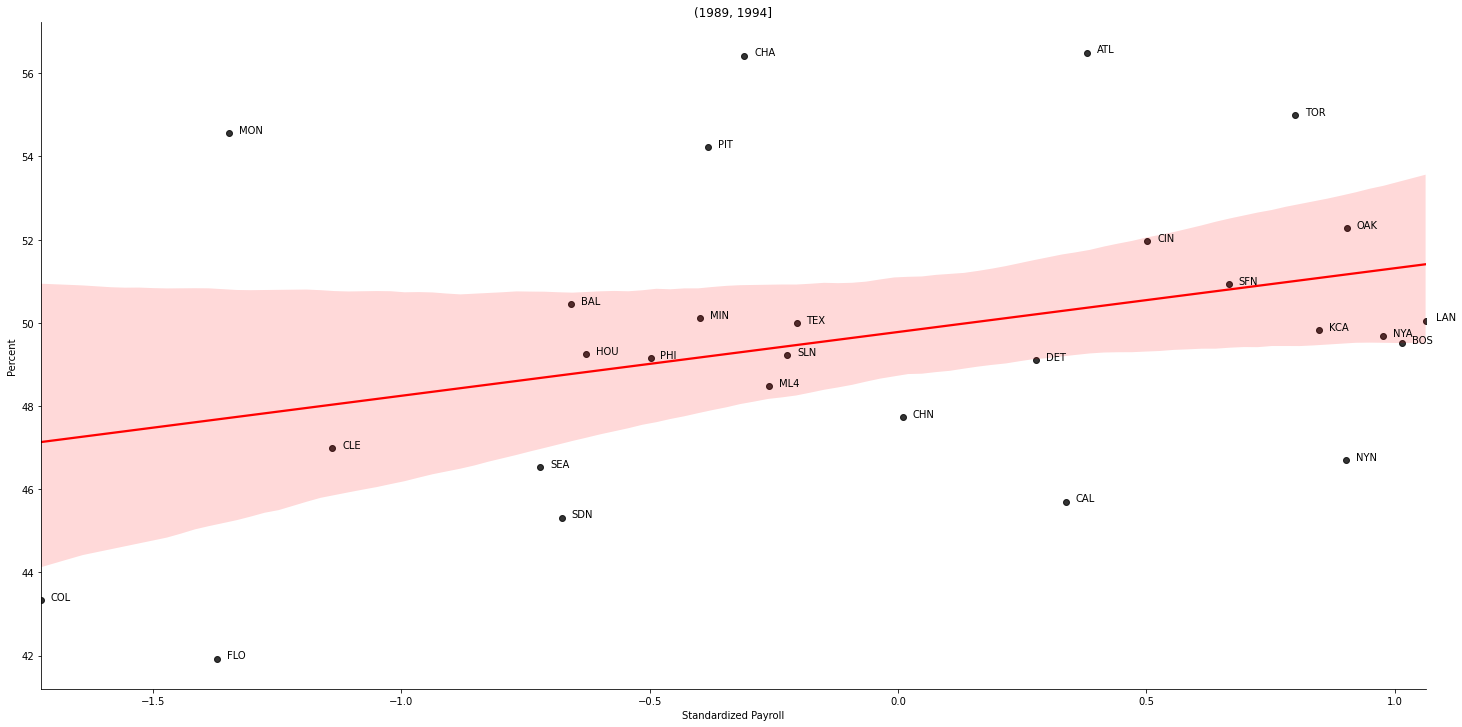

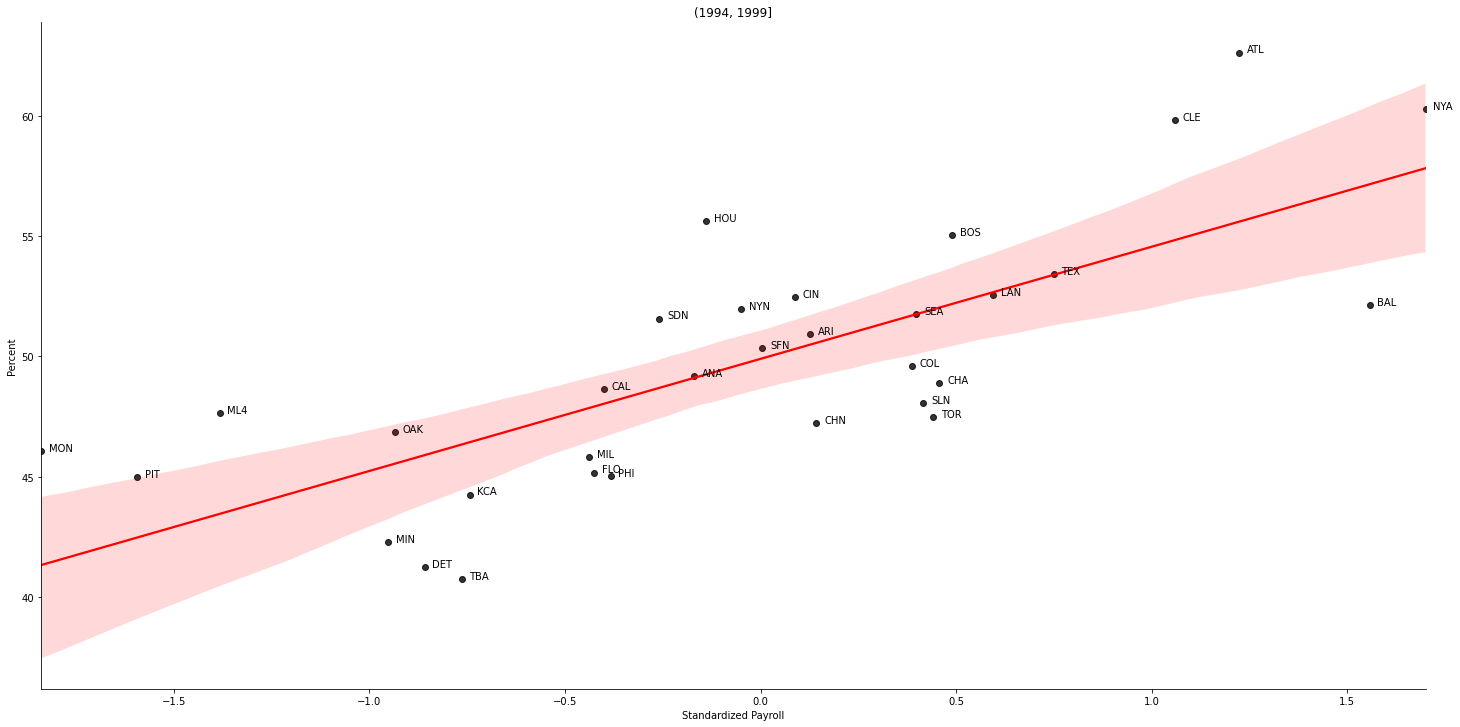

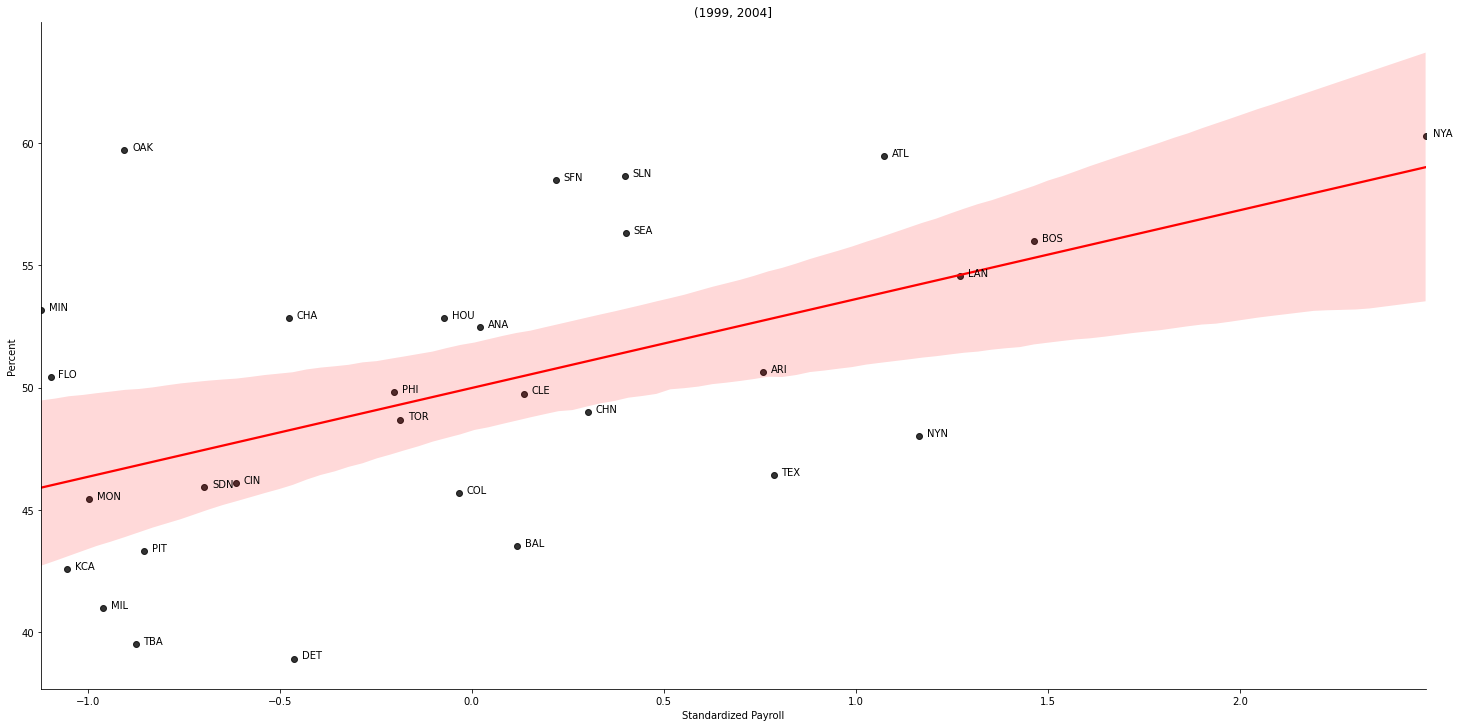

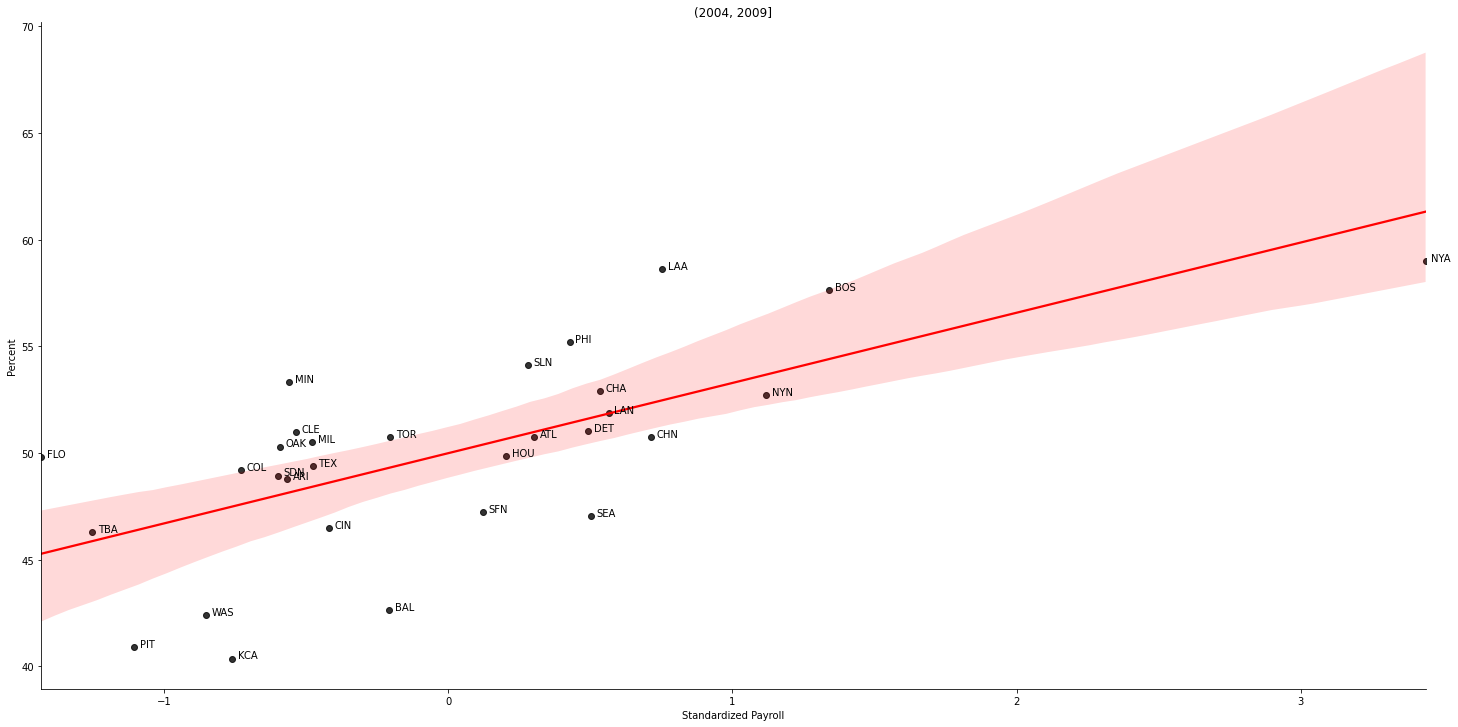

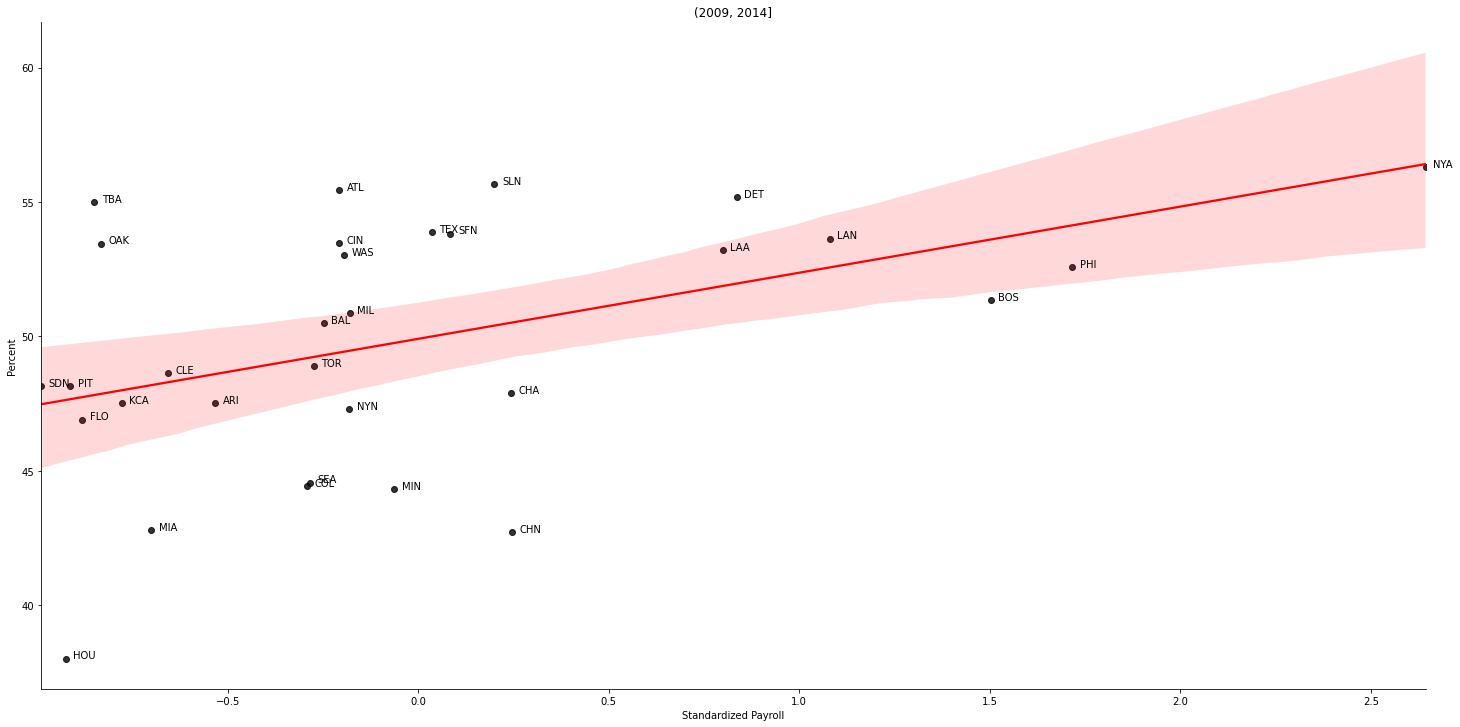

In [11]:
##run a for loop to make seperate dataframes based on yearID and use Seaborn to plot them

for yearID, temp in df3.groupby('yearID'):
    ax = sns.lmplot('std_payroll', # Horizontal axis
           'Percent', # Vertical axis
           data=temp, # Data source
           scatter_kws={"color": "black"},
           line_kws={'color': 'red'}, # fix a regression line
           size = 10,
           aspect =2 ) # size and dimension
    
    plt.title(temp['yearID'].iloc[0])
    # Set x-axis label
    plt.xlabel('Standardized Payroll')
    # Set y-axis label
    plt.ylabel('Percent')

#label the points as per teamID
    def label_point(x, y, val, ax):
        a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
        for i, point in a.iterrows():
            ax.text(point['x']+.02, point['y'], str(point['val']))

    label_point(temp.std_payroll, temp.Percent, temp.teamID, plt.gca())
    

#### Problem 6 Question3 
Both the plots show a very similar trend, you can see the teams outperforming the estimation and some underperforming
Both the set of plots indicate that
However, using Problem 6 plots is better because it plots a standardized payroll variable


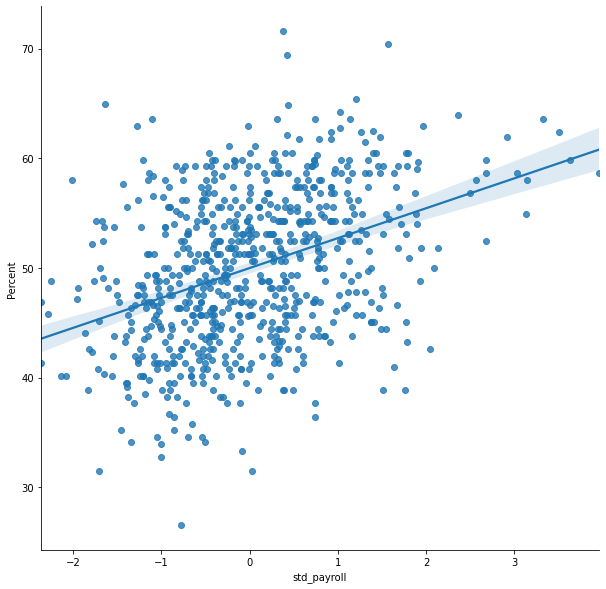

In [12]:
#Problem 7 
#a single scatter plot of winning percentage (y-axis) vs. standardized payroll (x-axis)
g= sns.regplot(x="std_payroll", y="Percent", data=df4);
g.figure.set_size_inches(10, 10)
sns.despine()


Expected wins
#Problem 8

In [13]:
#Create a new field to compute each team's spending effiency, given by the description
df4['exp_win'] = 50 + (2.5* df4['std_payroll'])
df4['eff'] = df4['W']-df4['exp_win']

In [14]:
#only keeping the data of the 5 given teams
df4= df4[(df4.teamID == 'OAK') | (df4.teamID == 'BOS') | (df4.teamID == 'NYA') | (df4.teamID == 'ATL') | (df4.teamID == 'TBA')]

In [15]:
df4 = df4.pivot(index='yearID', columns='teamID', values='eff')
#pivot returns reshaped DataFrame organized by given index / column values.
#yearID are rows
#teamID column
#data points are efficiency
df4.head(10)

teamID,ATL,BOS,NYA,OAK,TBA
yearID,,,,,
1990,16.668189,35.689467,14.454843,51.134099,NaN
1991,45.876553,29.797944,19.634676,29.133783,NaN
1992,47.004739,19.549915,24.207524,43.253580,NaN
1993,51.444780,28.668945,35.178469,16.481631,NaN
1994,13.237724,2.615836,16.308274,0.696471,NaN
1995,36.492803,36.403665,25.059006,16.005563,NaN
1996,42.369821,33.078428,37.318861,31.025434,NaN
1997,48.699537,27.368615,41.792475,18.108883,NaN
1998,52.980560,39.700451,60.066944,27.463151,15.491648


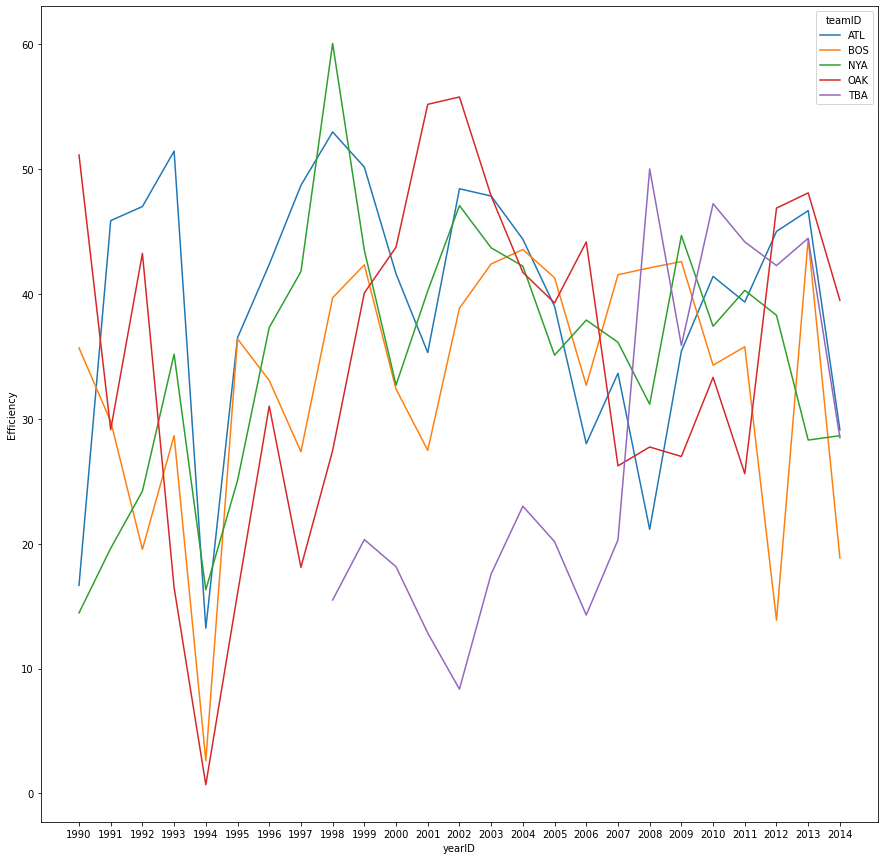

In [16]:
#plotting the effeciency of each team over the years 
#Honestly, seems very inconsistent and hard to analyze 
#TBA's efficiency seems to be the worst.Which means it is not winning as much as it is paying for
#OAk had a sudden spike between 1999-2004 
ax = df4.plot(figsize=(15,15),xticks=df4.index) #plot the data
ylab = ax.set_ylabel('Efficiency')

#### Question 4
In the 5 year split plots, between 1999- 2004 one can see how much better Oakland has performed in comparison to the expectation based on its spending
Both the plots show a very similar trend, you can see the Oakland outperforming the estimation

One can see that between 1997/1999-2004/2006 which Oakland had the highest winning percentage and one of the lowest budgeted teams with mean payroll and standardized payroll being one of the lowest.

You can thus see the efficiency spiking in that period as well
